In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load data dari file Excel
file_name = 'deskriptor.xlsx'
data = pd.read_excel(file_name)

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['IE'])  # Ambil semua kolom kecuali 'IE' sebagai fitur
y = data['IE']  # Kolom 'IE' sebagai target

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalisasi dan standarisasi data
scaler_minmax = MinMaxScaler()  # Normalisasi
scaler_standard = StandardScaler()  # Standarisasi

# Fit-transform pada data training
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_train_standardized = scaler_standard.fit_transform(X_train_normalized)

# Transform data testing
X_test_normalized = scaler_minmax.transform(X_test)
X_test_standardized = scaler_standard.transform(X_test_normalized)

# Inisialisasi model Random Forest dengan parameter terbaik
model = RandomForestRegressor(
    n_estimators=10000,           # Jumlah pohon
    max_depth=1000,               # Kedalaman maksimum pohon
    min_samples_leaf=1,         # Minimum sampel di daun
    max_features='sqrt',       # Fitur maksimum yang dipertimbangkan di setiap split
)

# Latih model pada data training
model.fit(X_train_standardized, y_train)

# Prediksi pada training dan test set
y_train_pred = model.predict(X_train_standardized)
y_test_pred = model.predict(X_test_standardized)

# Hitung metrik untuk training dan test set
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Tampilkan hasil
print("Training Set:")
print(f"R-squared: {train_r2:.4f}")
print(f"Mean Squared Error: {train_mse:.4f}")

print("\nTest Set:")
print(f"R-squared: {test_r2:.4f}")
print(f"Mean Squared Error: {test_mse:.4f}")

# Buat tabel untuk training dan test set
train_results = pd.DataFrame({
    'Actual': y_train.values,
    'Predicted': y_train_pred,
    'Residual': y_train.values - y_train_pred
})

test_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Residual': y_test.values - y_test_pred
})

print("\nTraining Set Results:")
print(train_results)

print("\nTest Set Results:")
print(test_results)



# # Simpan hasil ke file Excel (opsional)
# train_results.to_excel('train_set_results.xlsx', index=False)
# test_results.to_excel('test_set_results.xlsx', index=False)


Training Set:
R-squared: 0.8422
Mean Squared Error: 1.6243

Test Set:
R-squared: 0.5039
Mean Squared Error: 3.9320

Training Set Results:
    Actual  Predicted  Residual
0    96.39  95.816194  0.573806
1    93.12  91.070007  2.049993
2    93.00  93.957078 -0.957078
3    98.50  96.831223  1.668777
4    96.68  95.358258  1.321742
5    91.91  92.409850 -0.499850
6    94.80  94.870250 -0.070250
7    96.18  95.680464  0.499536
8    93.17  92.728006  0.441994
9    90.72  91.028914 -0.308914
10   89.37  90.265872 -0.895872
11   89.90  91.817836 -1.917836
12   87.36  90.227295 -2.867295
13   92.70  92.965437 -0.265437
14   94.89  94.704218  0.185782
15   95.29  93.938998  1.351002
16   95.02  94.132684  0.887316
17   95.97  95.252950  0.717050
18   85.43  87.822153 -2.392153
19   93.65  92.943982  0.706018
20   90.52  91.824805 -1.304805
21   95.00  94.499952  0.500048
22   92.18  92.164463  0.015537
23   96.00  95.012163  0.987837
24   96.04  95.545534  0.494466
25   93.32  93.947794 -0.62779

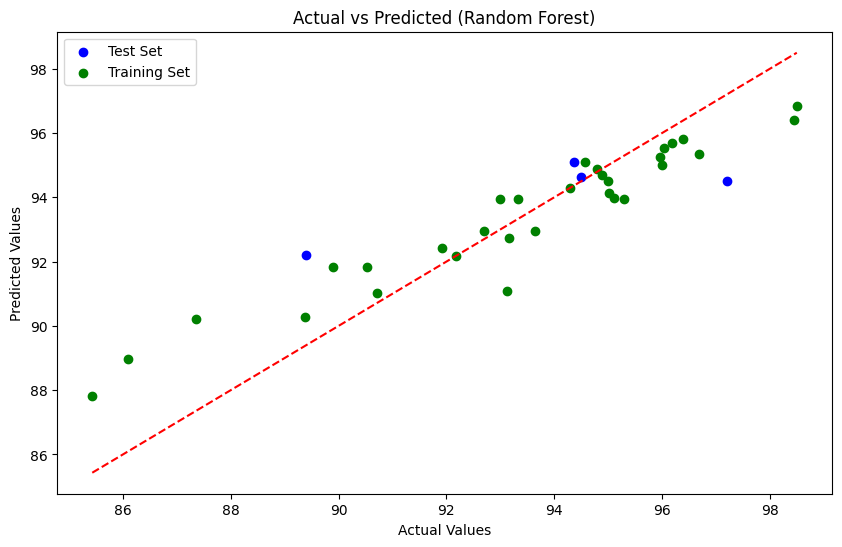

In [96]:
# Plot hasil prediksi vs eksperimen (Actual vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Test Set')
plt.scatter(y_train, y_train_pred, color='green', label='Training Set')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Random Forest)')
plt.legend()
plt.show()

In [97]:
print(test_results)

   Actual  Predicted  Residual
0   94.49  94.643238 -0.153238
1   94.37  95.108446 -0.738446
2   97.20  94.503398  2.696602
3   89.40  92.208446 -2.808446


In [98]:
print(train_results)

    Actual  Predicted  Residual
0    96.39  95.816194  0.573806
1    93.12  91.070007  2.049993
2    93.00  93.957078 -0.957078
3    98.50  96.831223  1.668777
4    96.68  95.358258  1.321742
5    91.91  92.409850 -0.499850
6    94.80  94.870250 -0.070250
7    96.18  95.680464  0.499536
8    93.17  92.728006  0.441994
9    90.72  91.028914 -0.308914
10   89.37  90.265872 -0.895872
11   89.90  91.817836 -1.917836
12   87.36  90.227295 -2.867295
13   92.70  92.965437 -0.265437
14   94.89  94.704218  0.185782
15   95.29  93.938998  1.351002
16   95.02  94.132684  0.887316
17   95.97  95.252950  0.717050
18   85.43  87.822153 -2.392153
19   93.65  92.943982  0.706018
20   90.52  91.824805 -1.304805
21   95.00  94.499952  0.500048
22   92.18  92.164463  0.015537
23   96.00  95.012163  0.987837
24   96.04  95.545534  0.494466
25   93.32  93.947794 -0.627794
26   86.10  88.963912 -2.863912
27   98.45  96.415256  2.034744
28   95.10  93.987854  1.112146
29   94.58  95.108446 -0.528446
30   94.

In [100]:
# Simpan hasil ke file Excel
train_results.to_excel('train_set_results_RF.xlsx', index=False)
test_results.to_excel('test_set_results_RF.xlsx', index=False)